<a href="https://colab.research.google.com/github/Pavan-Balusu/Customer_Churn_Analysis/blob/main/Telecom_churn_Analysis_by_pb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
data_set = pd.read_csv('/content/sample_data/telecom_customer_churn.csv')
data_set

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Zipcode Population,Latitude,Longitude,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,4498,34.827662,-118.999073,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,31297,34.162515,-118.203869,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,62069,33.645672,-117.922613,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,46677,38.014457,-122.115432,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,42853,34.227846,-119.079903,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,44652,32.759327,-116.997260,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,16525,37.734971,-120.954271,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,383,39.108252,-123.645121,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,12173,33.001813,-117.263628,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Zipcode Population                 7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Number of Referrals                7043 non-null   int64  
 11  Tenure in Months                   7043 non-null   int64

In [ ]:
data_set.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Zipcode Population                      0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                      

In [ ]:
New_data_set = data_set.dropna()
New_data_set

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Zipcode Population,Latitude,Longitude,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,62069,33.645672,-117.922613,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,46677,38.014457,-122.115432,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,42853,34.227846,-119.079903,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
18,0022-TCJCI,Male,79,No,0,Daly City,94015,63337,37.680844,-122.481310,...,Credit Card,62.70,2791.50,0.00,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
21,0023-XUOPT,Female,26,Yes,0,Carnelian Bay,96140,1943,39.227434,-120.091806,...,Bank Withdrawal,94.10,1215.60,0.00,0,566.28,1781.88,Churned,Other,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,9948-YPTDG,Male,44,Yes,0,San Rafael,94903,28403,38.018065,-122.546024,...,Bank Withdrawal,79.45,3013.05,9.36,40,1353.18,4396.87,Churned,Competitor,Competitor offered more data
7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,964,33.889605,-115.257009,...,Bank Withdrawal,-1.00,2030.30,10.20,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction
7023,9965-YOKZB,Male,73,No,0,Grizzly Flats,95636,659,38.636102,-120.522149,...,Bank Withdrawal,83.85,790.15,0.00,0,90.36,880.51,Churned,Dissatisfaction,Network reliability
7036,9985-MWVIX,Female,53,No,0,Hume,93628,93,36.807595,-118.901544,...,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [ ]:
New_data_set.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Zipcode Population                   0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music          

<ipython-input-30-b3b51de15c1f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c_mat = data_set.corr()


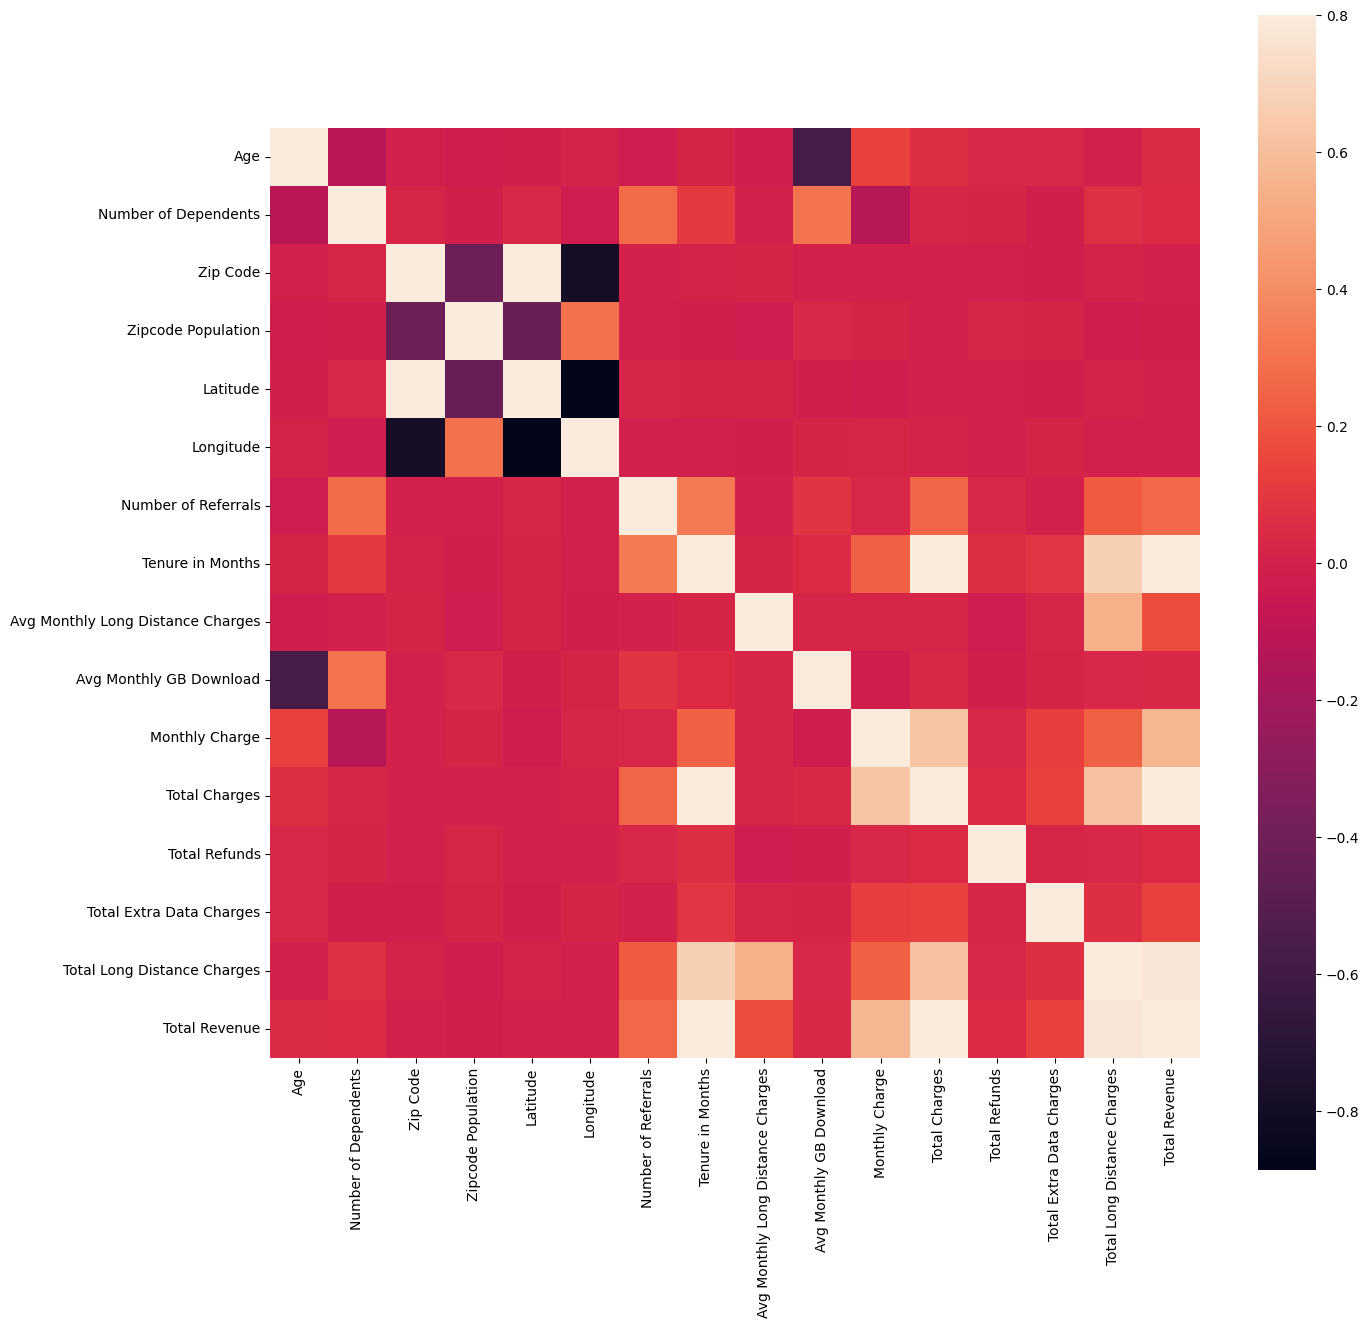

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
c_mat = data_set.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(c_mat, vmax=.8,square = True)
plt.show()

In [ ]:
data_set.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Zipcode Population', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

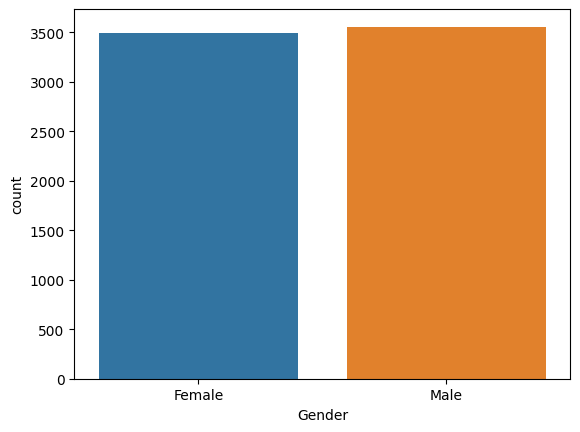

In [ ]:
ax = sns.countplot(x='Gender',data=data_set)

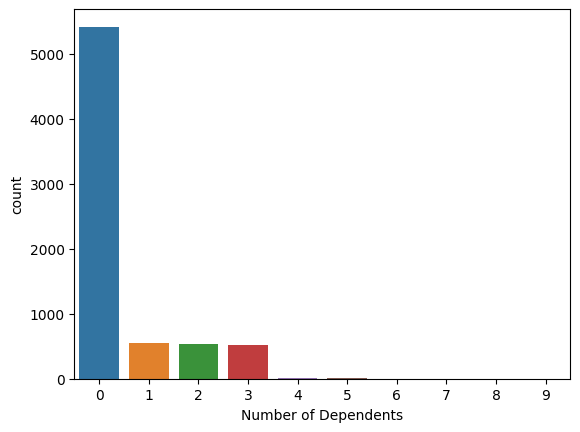

In [ ]:
ax = sns.countplot(x='Number of Dependents',data=data_set)

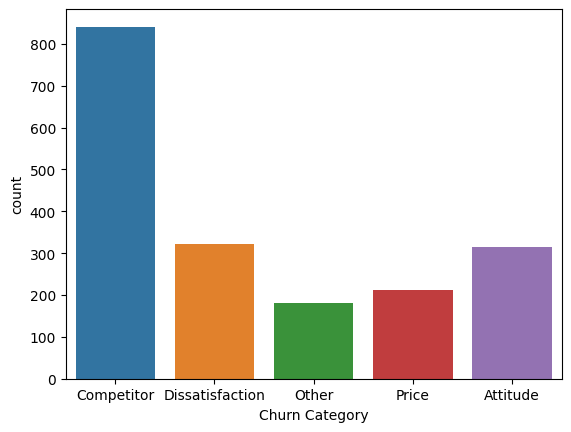

In [ ]:
ax = sns.countplot(x='Churn Category',data=data_set)

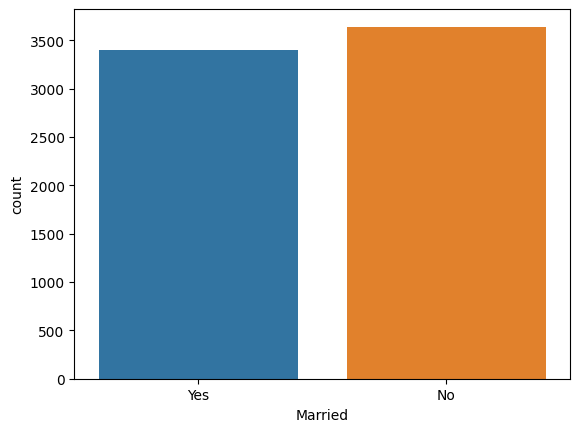

In [ ]:
ax = sns.countplot(x='Married',data=data_set)

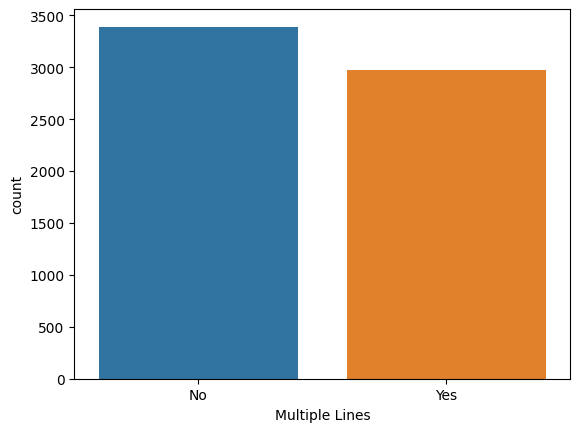

In [ ]:
ax = sns.countplot(x='Multiple Lines',data=data_set)